In [2]:
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

import artm

# Адрес, по которому находятся данные
BATCH_ADRESS = 'batches_news_ria_24k'

# Вывод версии BigARTM
print(artm.version())

0.10.0


In [3]:
# Установка адреса, по которому находятся данные
batch_vectorizer = artm.BatchVectorizer(
    data_path=BATCH_ADRESS, data_format='batches'
)

In [4]:
# Пересоздание словаря и сохранение его в файл
def new_dict(address, batch_vectorizer):
    
    # Инициализация словоря
    new_dict = artm.Dictionary()
    
    # Удаление словаря, оставшегося после предыдущих запусков
    if os.path.isfile(address):
        os.remove(address)

    # Сохранение словаря в файл
    new_dict.gather(data_path=batch_vectorizer.data_path)
    new_dict.save(dictionary_path=address)

    # Загрузка словаря из файла
    new_dict.load(dictionary_path=address)
    
    return new_dict

In [5]:
# Пересоздание словаря для анализа и сохранение его в файл
dictionary_analysis = new_dict(BATCH_ADRESS + '/analysis_dictionary.dict', batch_vectorizer)
# Проанализируем абсолютную частотность слов в коллекции
mention_collection_count = []
for i in range(10000):
    mention_collection_count.append(dictionary_analysis.filter(min_tf=i).__dict__['_master'].get_info().dictionary[0].num_entries)

# Пересоздание словаря для анализа и сохранение его в файл
dictionary_analysis = new_dict(BATCH_ADRESS + '/analysis_dictionary.dict', batch_vectorizer)
# Проанализируем абсолютную частотность слов в документах
mention_documents_count = []
for i in range(10000):
    mention_documents_count.append(dictionary_analysis.filter(min_df=i).__dict__['_master'].get_info().dictionary[0].num_entries)

# Пересоздание словаря для анализа и сохранение его в файл
dictionary_analysis = new_dict(BATCH_ADRESS + '/analysis_dictionary.dict', batch_vectorizer)
# Проанализируем абсолютную частотность слов в документах
mention_documents_rate = []
for i in np.linspace(0,1,100):
    mention_documents_rate.append(dictionary_analysis.filter(min_df_rate=i).__dict__['_master'].get_info().dictionary[0].num_entries)


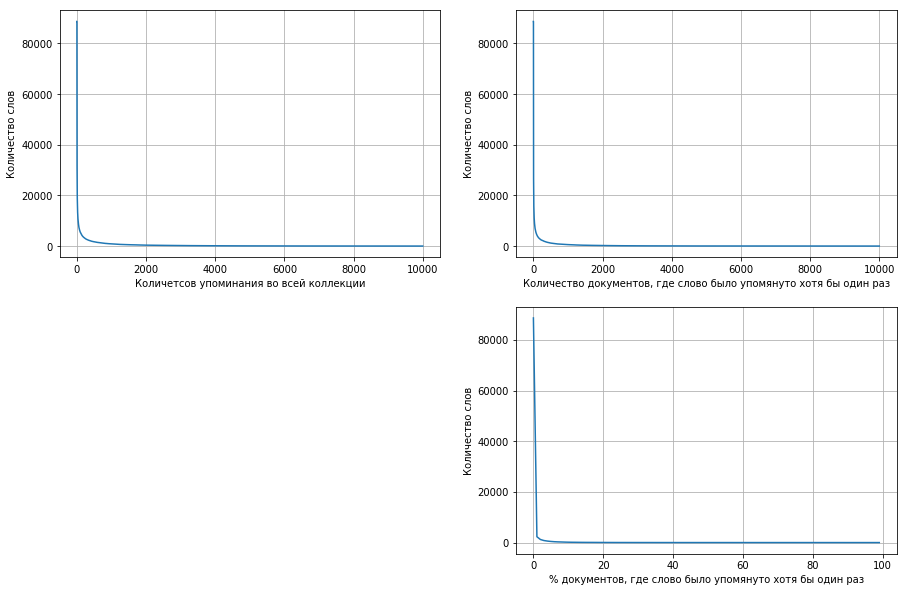

In [6]:
# Отрисовка
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax1.plot(mention_collection_count)
ax1.set_xlabel('Количетсов упоминания во всей коллекции')
ax1.set_ylabel('Количество слов')
ax1.grid(True)

ax1 = fig.add_subplot(222)
ax1.plot(mention_documents_count)
ax1.set_xlabel('Количество документов, где слово было упомянуто хотя бы один раз')
ax1.set_ylabel('Количество слов')
ax1.grid(True)

ax1 = fig.add_subplot(224)
ax1.plot(mention_documents_rate)
ax1.set_xlabel('% документов, где слово было упомянуто хотя бы один раз')
ax1.set_ylabel('Количество слов')
ax1.grid(True)